# BoN vs Word Embeddings + Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [10]:
df_bow = pd.read_csv("../reports/f1_score_bow_diff_train_size.csv")
df_word_embedd = pd.read_csv("../reports/f1_score_word_embedd_diff_train_size.csv")

X = np.array(df_bow["train_size"].tolist()) / 1000
y_bow = df_bow.drop(['train_size'], axis=1).values.tolist()
y_word_embedd = df_word_embedd.drop(['train_size'], axis=1).values.tolist()

total_width = 10
ind_width = total_width / 32
x_ticks = np.arange(-(total_width / 2), total_width / 2, ind_width)
args = list(zip(*[x_ticks[i::8] for i in range(8)])) 
colors = ['r', 'b', '#f47be9', 'm', 'c', '#feff60', '#007485', '#7663b0']

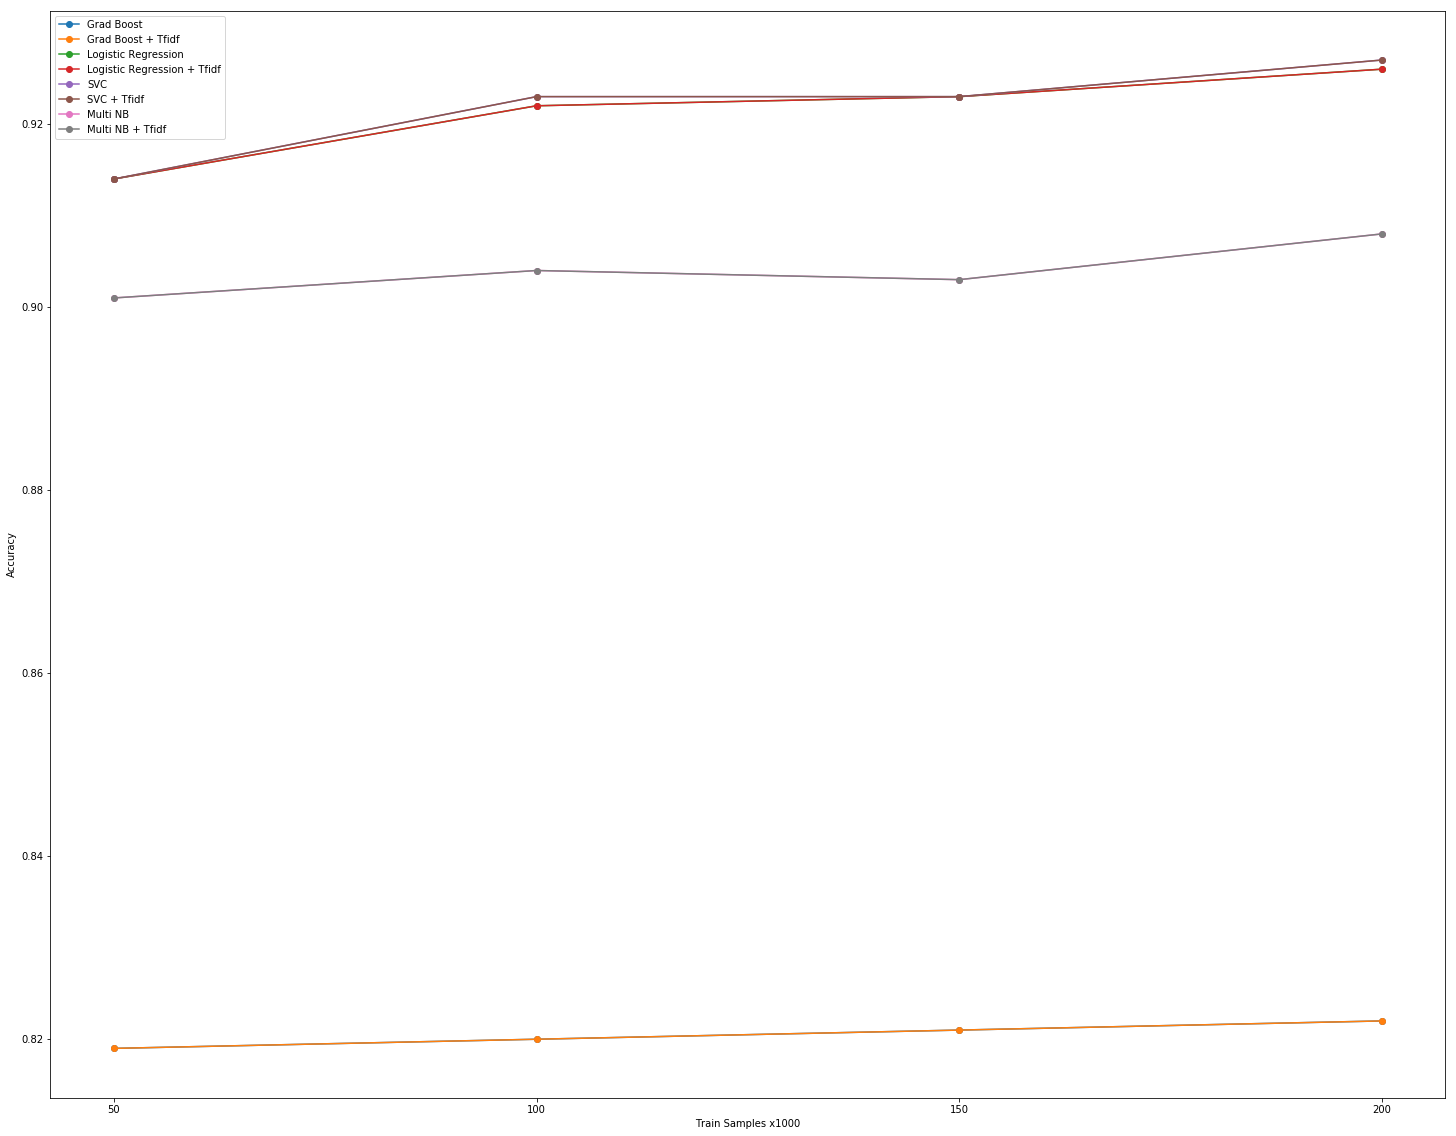

In [3]:
plt.figure(figsize=(25, 20))
plt.plot(X, y_bow, marker="o")
plt.xticks(X, X.astype(np.uint))

plt.legend(["Grad Boost", "Grad Boost + Tfidf", "Logistic Regression", "Logistic Regression + Tfidf", "SVC", "SVC + Tfidf", "Multi NB", "Multi NB + Tfidf"])
plt.ylabel("Accuracy")
plt.xlabel("Train Samples x1000")

plt.show()

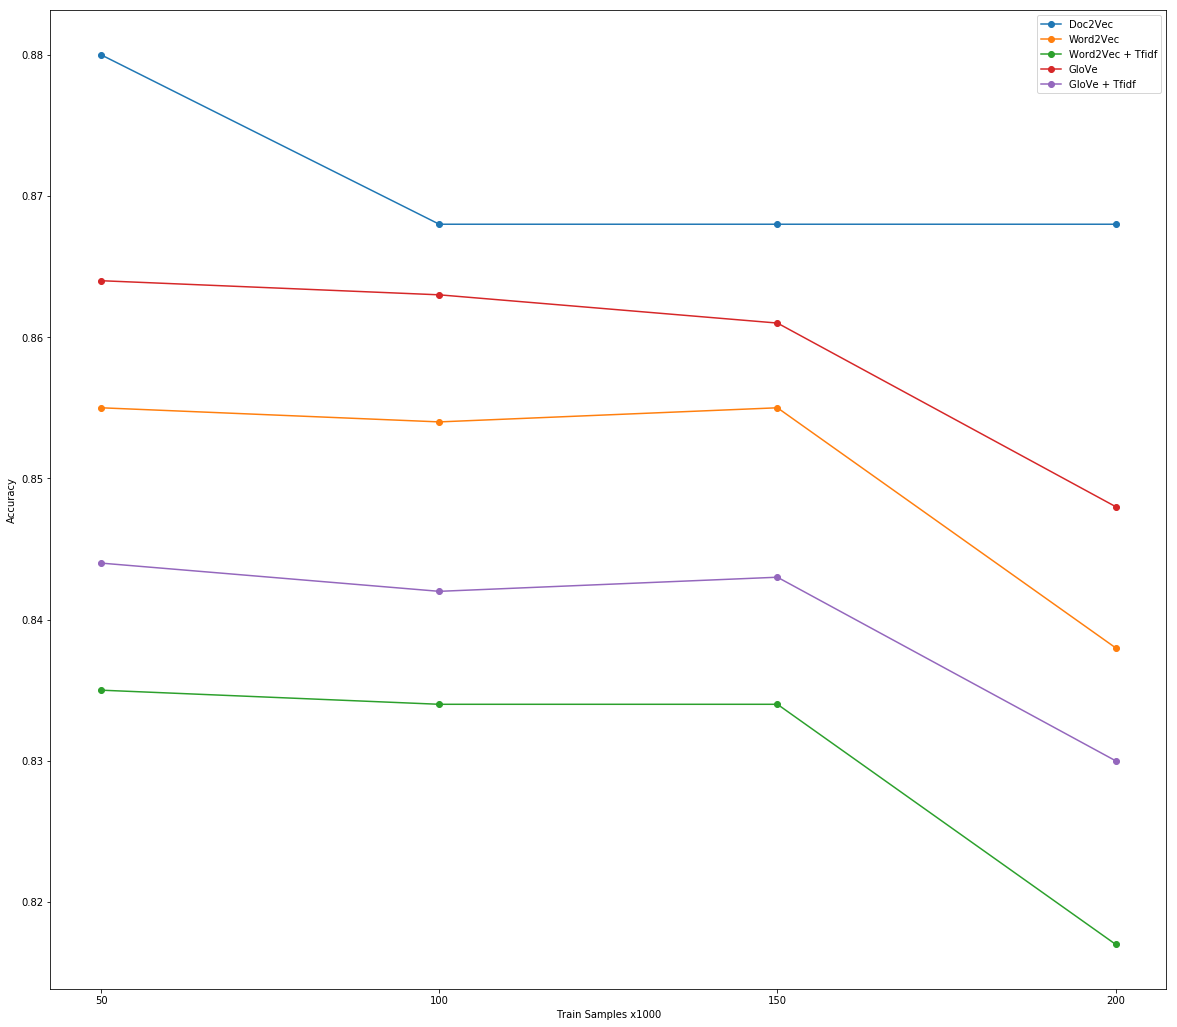

In [5]:
plt.figure(figsize=(20, 18))
plt.plot(X, y_word_embedd, marker="o")
plt.xticks(X, X.astype(np.uint))

plt.legend(["Doc2Vec", "Word2Vec", "Word2Vec + Tfidf", "GloVe", "GloVe + Tfidf"])
plt.ylabel("Accuracy")
plt.xlabel("Train Samples x1000")

plt.show()

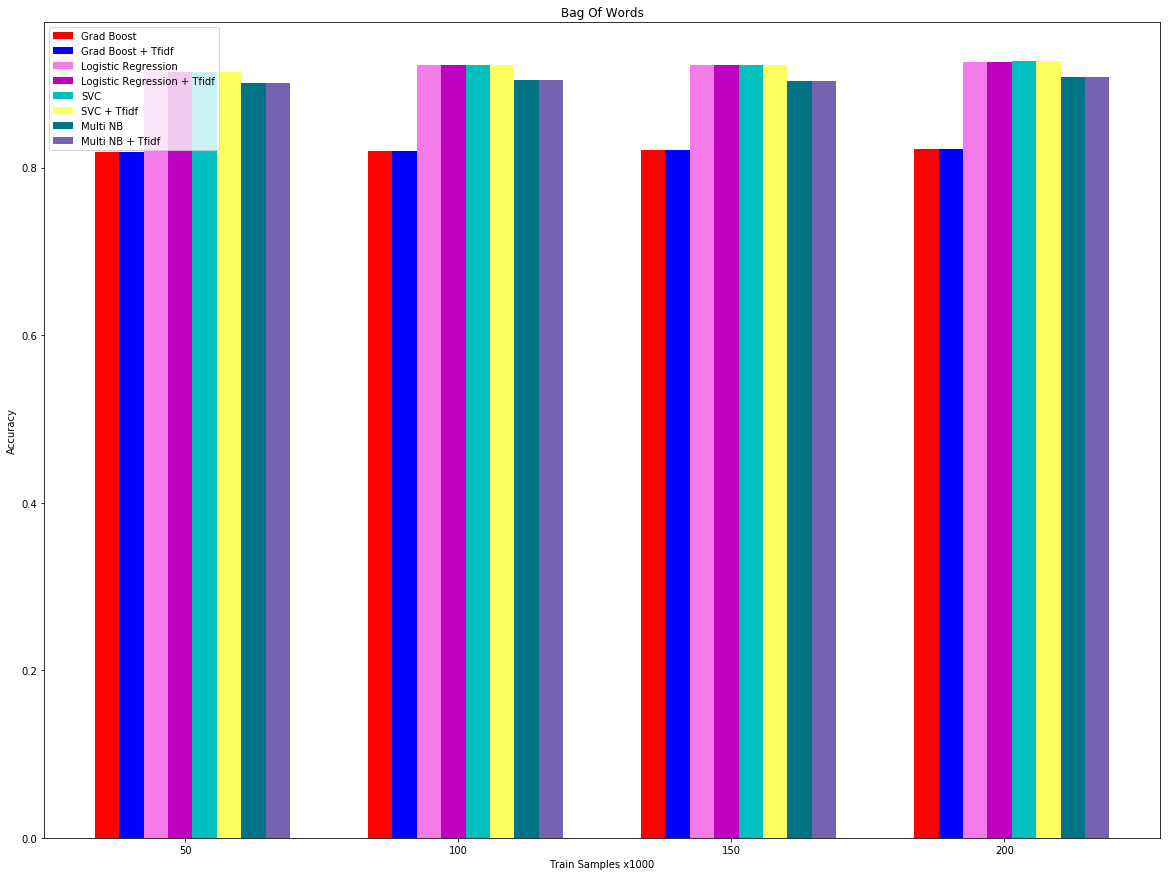

In [11]:
plt.subplots(figsize=(20,15))
y_data_names = ["Grad Boost", "Grad Boost + Tfidf", "Logistic Regression", "Logistic Regression + Tfidf", "SVC", "SVC + Tfidf", "Multi NB", "Multi NB + Tfidf"]

for i in range(0, len(X)):
    for j in range(0, len(y_bow[0])):
        plt.bar(i + args[i][j], y_bow[i][j], color=colors[j], label=y_data_names[j], width=ind_width)

plt.ylabel("Accuracy")
plt.xlabel("Train Samples x1000")
plt.title("Bag Of Words")
plt.xticks([-4, -0.5, 3, 6.5], [50, 100, 150, 200])
plt.legend(y_data_names)

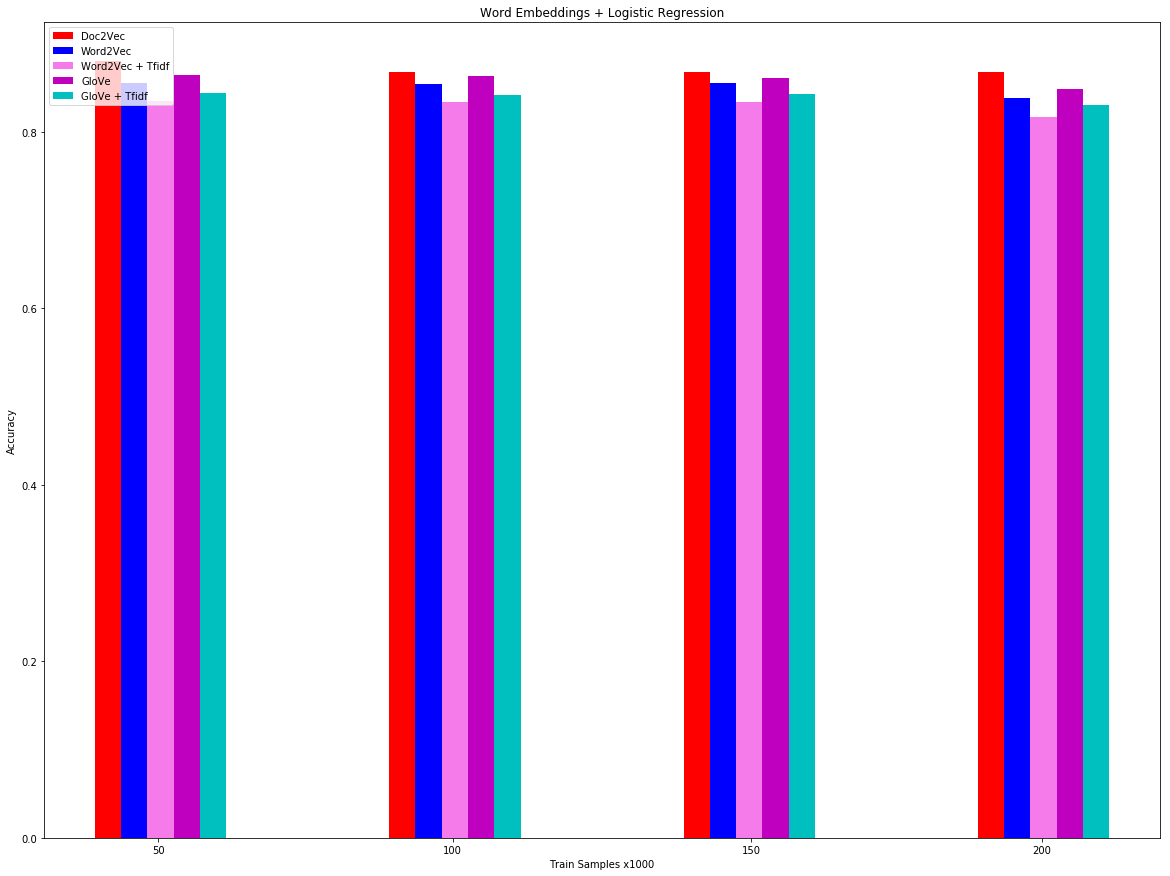

In [12]:
plt.subplots(figsize=(20,15))
y_data_names = ["Doc2Vec", "Word2Vec", "Word2Vec + Tfidf", "GloVe", "GloVe + Tfidf"]

for i in range(0, len(X)):
    for j in range(0, len(y_word_embedd[0])):
        plt.bar(i + args[i][j], y_word_embedd[i][j], color=colors[j], label=y_data_names[j], width=ind_width)

plt.ylabel("Accuracy")
plt.xlabel("Train Samples x1000")
plt.title("Word Embeddings + Logistic Regression")
plt.xticks([-4.4, -0.9, 2.65, 6.1], [50, 100, 150, 200])
plt.legend(y_data_names, loc='upper left')